In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import mne
import xarray as xr
import matplotlib.pyplot as plt
from scipy import signal
import ghibtools as gh
import pandas as pd
import seaborn as sns
import neurokit2 as nk
from params import *
from bibliotheque import *

In [3]:
def epoching(da, df_triggs):
    da_concat = []
    for bloc in blocs:
        da_bloc = gh.init_da({'trial':count_trials[bloc],'chan':da.coords['chan'].values, 'time':np.arange(0,trial_durations[bloc], 1/srate)})
        for i, trial in enumerate(count_trials[bloc]):
            start = int(df_triggs.loc[(bloc,trial,'start'),'timestamp'] * srate)
            stop = start + int(trial_durations[bloc]*srate)
            da_bloc[i,:,:] = da[:,start:stop].values
        da_concat.append(da_bloc)
    da_sliced = xr.concat(da_concat, dim = 'bloc').assign_coords({'bloc':blocs})
    return da_sliced

In [4]:
subject_keys

['P01',
 'P03',
 'P04',
 'P05',
 'P06',
 'P07',
 'P08',
 'P09',
 'P10',
 'P11',
 'P12',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19']

In [5]:
psd_respi = None
for participant in subject_keys:
    print(participant)
    for session in recording_sessions:
        print(session)
        file = data_path + f'{participant}/signaux/sub{participants_label[participant]}_{session}.vhdr'
        raw = mne.io.read_raw_brainvision(file, verbose=False)
        da = mne_to_xarray(raw)
        df_triggs = get_triggs(raw, blocs, code_trigg)
        da_sliced = epoching(da, df_triggs)
        odeur = get_odor_from_session(participant, session)
        for trial in count_trials['Free']:
            resp = da_sliced.loc['Free',trial,'RespiNasale',:].values
            f, Pxx = gh.spectre(resp, srate, lowest_freq = 0.1)
            if psd_respi is None:
                psd_respi = gh.init_da({'participant':subject_keys,'odeurs':odeurs,'trial':count_trials['Free'],'freqs':f})
            psd_respi.loc[participant, odeur, trial, :] = Pxx

P01
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file, verbose=False)


ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file, verbose=False)


ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P03
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file, verbose=False)


ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P04
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file, verbose=False)


ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P05
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(file, verbose=False)


ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P06
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P07
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P08
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P09
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P10
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P11
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P12
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P14
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P15
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P16
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P17
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P18
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

P19
ses02


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses03


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

ses04


/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(file, verbose=False)
/tmp/ipykernel_7154/2182312034.py:7: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['ECG', 'GSR', 'RespiNasale', 'RespiVentrale']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channe

In [6]:
psd_respi

<xarray.DataArray (participant: 17, odeurs: 3, trial: 2, freqs: 50001)>
array([[[[4.55181350e+00, 1.10545313e+01, 1.37777433e+01, ...,
          2.94699575e-08, 2.48042540e-08, 1.08323609e-08],
         [1.63730824e+00, 4.57782431e+00, 6.38020103e+00, ...,
          1.84661240e-08, 2.53755766e-08, 1.43969550e-08]],

        [[3.00800259e+00, 6.88933881e+00, 1.07457156e+01, ...,
          2.31584219e-08, 1.51269788e-08, 5.81744070e-09],
         [8.08015678e+00, 1.72416595e+01, 1.73125538e+01, ...,
          1.35445037e-08, 1.36798782e-08, 6.86805393e-09]],

        [[1.04128105e+00, 5.40597496e+00, 1.04120698e+01, ...,
          2.07315564e-08, 1.57337715e-08, 6.62601788e-09],
         [2.07787452e+00, 6.24495224e+00, 9.42590625e+00, ...,
          1.57241141e-08, 1.30713805e-08, 6.27600659e-09]]],


       [[[6.12827921e+00, 1.12217373e+01, 1.09138634e+01, ...,
          2.00465365e-08, 2.73563125e-08, 1.58669221e-08],
         [1.47472398e+00, 3.06420237e+00, 3.29107710e+00, ...,
          1.59230000e-08, 1.52486629e-08, 7.69092670e-09]],
...
        [[1.00575492e+00, 2.30457976e+00, 3.77162520e+00, ...,
          1.03519140e-08, 7.68387168e-09, 3.33296023e-09],
         [1.31761067e+00, 2.47717685e+00, 2.23066242e+00, ...,
          3.25064539e-08, 3.18410290e-08, 1.60687716e-08]]],


       [[[8.97635458e+00, 1.99358066e+01, 2.34814115e+01, ...,
          1.47416621e-08, 1.71655743e-08, 8.96462463e-09],
         [1.22473172e+01, 3.43769955e+01, 6.13183133e+01, ...,
          8.42755635e-08, 1.03306842e-07, 5.57182691e-08]],

        [[2.77987296e+01, 9.19066046e+01, 1.40104405e+02, ...,
          1.28267678e-07, 1.25747159e-07, 6.20102474e-08],
         [1.09655503e+01, 2.33808271e+01, 2.72087032e+01, ...,
          2.99840495e-08, 2.80760446e-08, 1.44908636e-08]],

        [[1.65451385e+01, 4.65480836e+01, 7.66932936e+01, ...,
          9.24854947e-08, 9.64792193e-08, 5.16187396e-08],
         [1.57901691e+01, 2.63784174e+01, 1.71900066e+01, ...,
          3.53104964e-08, 3.40484929e-08, 1.55073261e-08]]]])
Coordinates:
  * participant  (participant) <U3 'P01' 'P03' 'P04' 'P05' ... 'P17' 'P18' 'P19'
  * odeurs       (odeurs) <U6 'odor_o' 'odor_+' 'odor_-'
  * trial        (trial) int64 1 2
  * freqs        (freqs) float64 0.0 0.01 0.02 0.03 ... 500.0 500.0 500.0 500.0

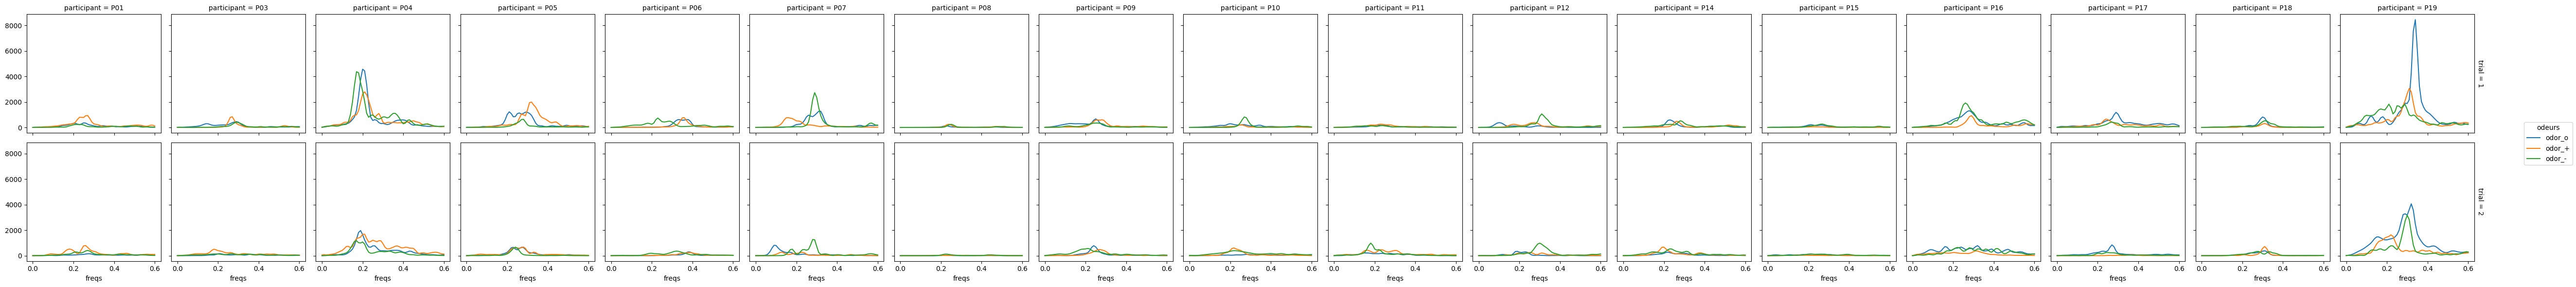

In [7]:
psd_respi.sel(freqs = slice(0,0.6)).plot.line(x='freqs', col = 'participant', hue = 'odeurs', row = 'trial')

In [8]:
psd_respi

<xarray.DataArray (participant: 17, odeurs: 3, trial: 2, freqs: 50001)>
array([[[[4.55181350e+00, 1.10545313e+01, 1.37777433e+01, ...,
          2.94699575e-08, 2.48042540e-08, 1.08323609e-08],
         [1.63730824e+00, 4.57782431e+00, 6.38020103e+00, ...,
          1.84661240e-08, 2.53755766e-08, 1.43969550e-08]],

        [[3.00800259e+00, 6.88933881e+00, 1.07457156e+01, ...,
          2.31584219e-08, 1.51269788e-08, 5.81744070e-09],
         [8.08015678e+00, 1.72416595e+01, 1.73125538e+01, ...,
          1.35445037e-08, 1.36798782e-08, 6.86805393e-09]],

        [[1.04128105e+00, 5.40597496e+00, 1.04120698e+01, ...,
          2.07315564e-08, 1.57337715e-08, 6.62601788e-09],
         [2.07787452e+00, 6.24495224e+00, 9.42590625e+00, ...,
          1.57241141e-08, 1.30713805e-08, 6.27600659e-09]]],


       [[[6.12827921e+00, 1.12217373e+01, 1.09138634e+01, ...,
          2.00465365e-08, 2.73563125e-08, 1.58669221e-08],
         [1.47472398e+00, 3.06420237e+00, 3.29107710e+00, ...,
          1.59230000e-08, 1.52486629e-08, 7.69092670e-09]],
...
        [[1.00575492e+00, 2.30457976e+00, 3.77162520e+00, ...,
          1.03519140e-08, 7.68387168e-09, 3.33296023e-09],
         [1.31761067e+00, 2.47717685e+00, 2.23066242e+00, ...,
          3.25064539e-08, 3.18410290e-08, 1.60687716e-08]]],


       [[[8.97635458e+00, 1.99358066e+01, 2.34814115e+01, ...,
          1.47416621e-08, 1.71655743e-08, 8.96462463e-09],
         [1.22473172e+01, 3.43769955e+01, 6.13183133e+01, ...,
          8.42755635e-08, 1.03306842e-07, 5.57182691e-08]],

        [[2.77987296e+01, 9.19066046e+01, 1.40104405e+02, ...,
          1.28267678e-07, 1.25747159e-07, 6.20102474e-08],
         [1.09655503e+01, 2.33808271e+01, 2.72087032e+01, ...,
          2.99840495e-08, 2.80760446e-08, 1.44908636e-08]],

        [[1.65451385e+01, 4.65480836e+01, 7.66932936e+01, ...,
          9.24854947e-08, 9.64792193e-08, 5.16187396e-08],
         [1.57901691e+01, 2.63784174e+01, 1.71900066e+01, ...,
          3.53104964e-08, 3.40484929e-08, 1.55073261e-08]]]])
Coordinates:
  * participant  (participant) <U3 'P01' 'P03' 'P04' 'P05' ... 'P17' 'P18' 'P19'
  * odeurs       (odeurs) <U6 'odor_o' 'odor_+' 'odor_-'
  * trial        (trial) int64 1 2
  * freqs        (freqs) float64 0.0 0.01 0.02 0.03 ... 500.0 500.0 500.0 500.0

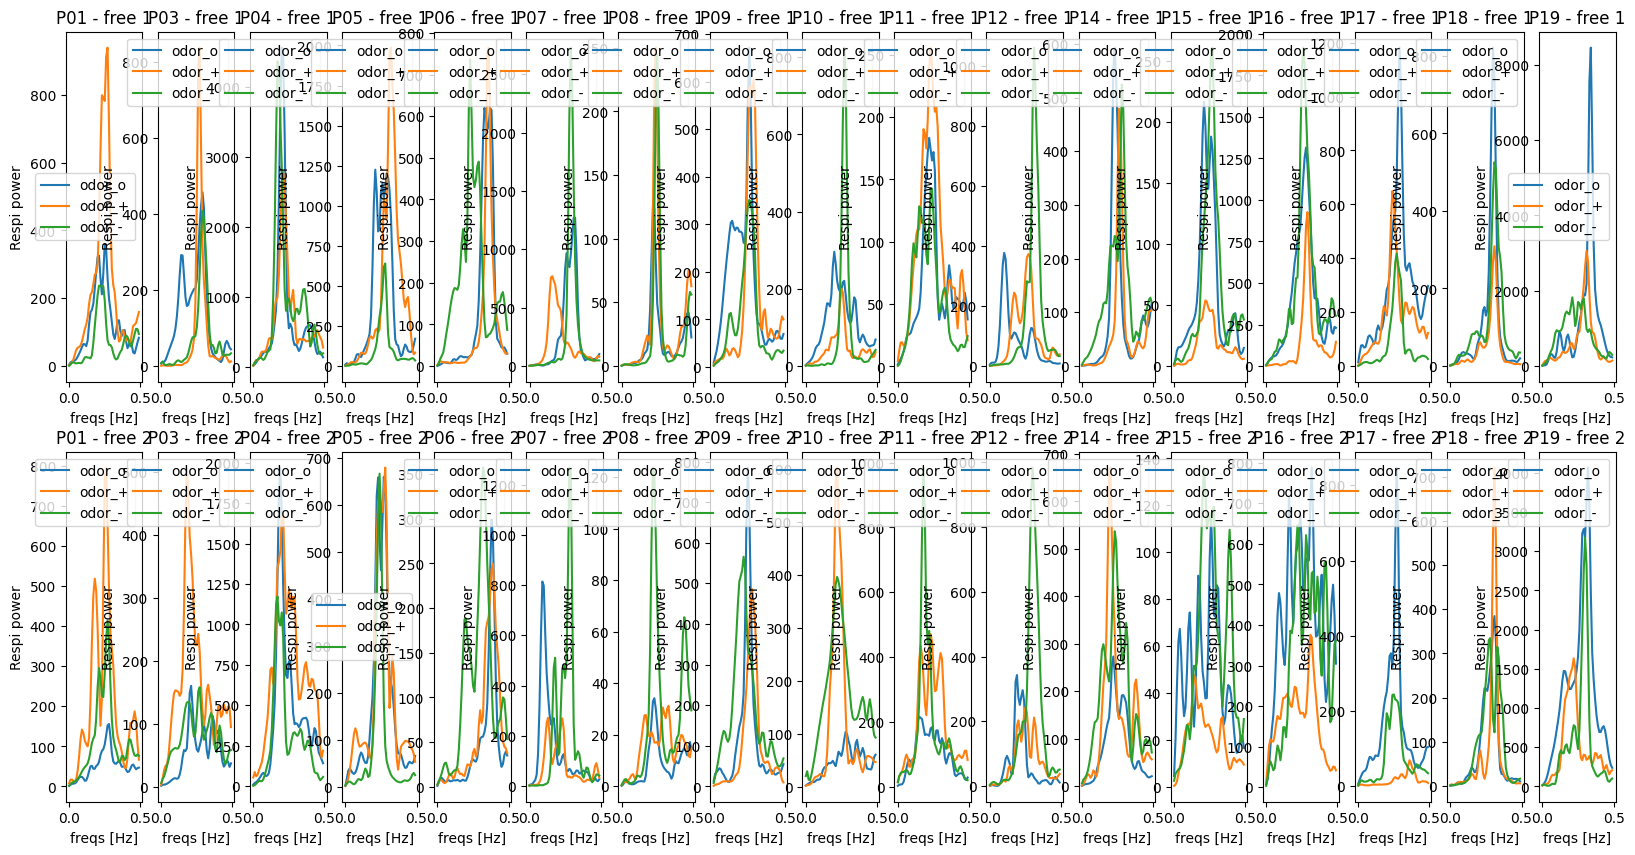

In [9]:
fig, axs = plt.subplots(ncols = len(subject_keys), nrows = len(count_trials['Free']), figsize = (20,10))

f = psd_respi.coords['freqs'].values
fmax = 0.5
mask = f<fmax

rows = []
for col, participant in enumerate(subject_keys):
    for row, trial in enumerate(count_trials['Free']):
        ax = axs[row, col]

        for odeur in odeurs:
            pxx = psd_respi.loc[participant, odeur, trial, :].values
            rows.append([participant,trial,odeur,f[np.argmax(pxx)]])
            ax.plot(f[mask], pxx[mask] , label = odeur)
        ax.set_title(f'{participant} - free {trial}')
        ax.set_xlabel('freqs [Hz]')
        ax.set_ylabel('Respi power')
        ax.legend()

max_resp = pd.DataFrame(rows, columns = ['participant','trial','odeur','max'])

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/mnt/autofs/cmo/Etudiants/Valentin_G/ghibtools/ghibtools/stats.py:358: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset

<AxesSubplot: title={'center': 'Effect of odeur on max : ns \n  N = 17 subjects * 3 groups (*2 trial/group) \n rm_anova : p-0.75, np2 : 0.018 (S)'}, xlabel='odeur', ylabel='max'>

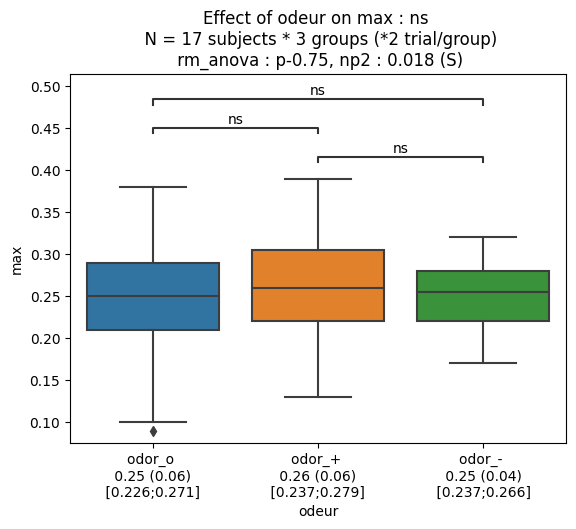

In [10]:
gh.auto_stats(df=max_resp, predictor = 'odeur', outcome = 'max', design = 'within', subject = 'participant')